In [ ]:
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt

5.1

In [ ]:
df=pd.read_csv('TSLA.csv')
df['Date'] = pd.to_datetime(df['Date'])

dr=df['Close Price'].pct_change().fillna(0).mean()
dsr=df['Close Price'].pct_change().fillna(0).std()
ar=dr*252
asr=dsr*m.sqrt(252)

print('Mean Daily Return: ',dr)
print('Daily Standard Deviation: ',dsr)
print('Annual Mean: ',ar)
print('Annual Standard Deviation: ',asr)

Mean Daily Return:  0.0007298232034346197
Daily Standard Deviation:  0.033607824959498205
Annual Mean:  0.18391544726552417
Annual Standard Deviation:  0.5335076816917299


5.2

In [ ]:
df5 = pd.DataFrame()

df1 = pd.read_csv("ASHOKA.csv")
df5["ashoka"] = df1['Close Price']
df1 = pd.read_csv("BAJAJELEC.csv")
df5["bajaj"] = df1['Close Price']
df1 = pd.read_csv("BOMDYEING.csv")
df5["bomdyeing"] = df1['Close Price']
df1 = pd.read_csv("CENTURYPLY.csv")
df5["centuryply"] = df1['Close Price']
df1 = pd.read_csv("FORTIS.csv")
df5["fortis"] = df1['Close Price']

df5n = pd.DataFrame()
df5m = (df5.pct_change().dropna().mean()*0.2*252).sum()
df5n = m.sqrt((df5.pct_change().dropna().cov()*252*0.04).sum().sum())

print("volatility", df5n)
print("annual return",df5m)

volatility 0.2604625571622476
annual return 0.023106141378833937


5.3 and 5.4

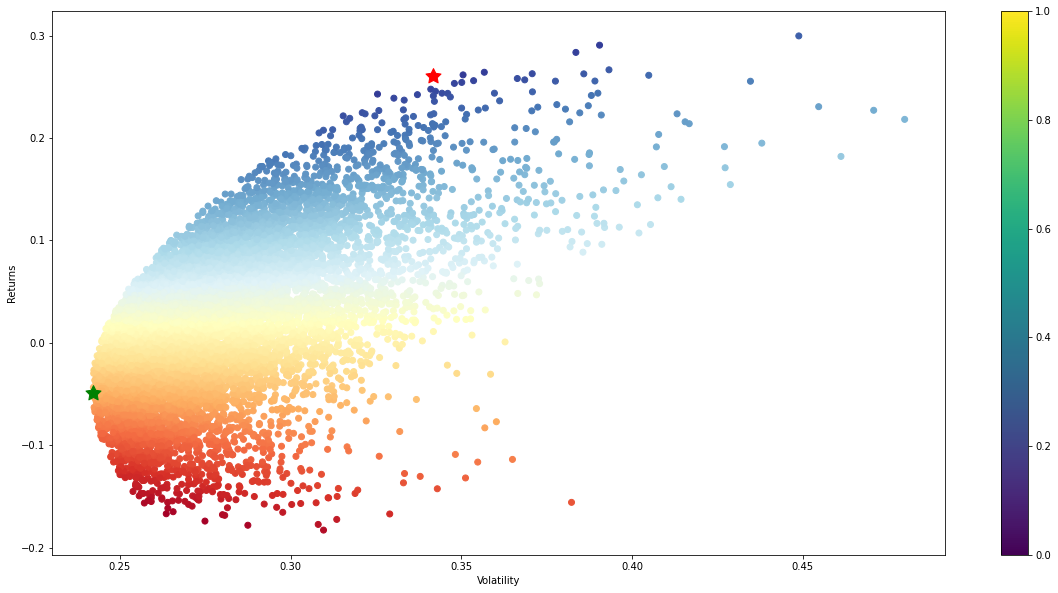

In [ ]:
mean = df5.pct_change().mean()
cov = df5.pct_change().cov()
n = 10000
result = np.zeros((3, n))
for i in range(n):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov, weights))) * np.sqrt(252)
    result[0,i] = portfolio_return
    result[1,i] = portfolio_std
    result[2,i] = result[0,i] / result[1,i]
result_frame = pd.DataFrame(result.T,columns=['Return','STD','ratio'])
max_sharpe_port = result_frame.iloc[result_frame['ratio'].idxmax()]
min_vol_port = result_frame.iloc[result_frame['STD'].idxmin()]
plt.figure(figsize=(20,10))
plt.scatter(result_frame.STD,result_frame.Return,c=result_frame.Sharpe,cmap='RdYlBu');
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=250);
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=250);
plt.colorbar();